In [1]:
from google.colab import files
files.upload()

Saving crocodile_dataset.csv to crocodile_dataset.csv


{'crocodile_dataset.csv': b"Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes\r\n1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.9,62,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.\r\n2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operation speak according.\r\n3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough analysis least by two.\r\n4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('crocodile_dataset.csv')

# Show first few rows
print(df.head())

# Summary info
print(df.info())

# Statistical summary
print(df.describe())


   Observation ID                         Common Name         Scientific Name  \
0               1                 Morelet's Crocodile    Crocodylus moreletii   
1               2                  American Crocodile       Crocodylus acutus   
2               3                   Orinoco Crocodile  Crocodylus intermedius   
3               4                 Morelet's Crocodile    Crocodylus moreletii   
4               5  Mugger Crocodile (Marsh Crocodile)    Crocodylus palustris   

         Family       Genus  Observed Length (m)  Observed Weight (kg)  \
0  Crocodylidae  Crocodylus                 1.90                  62.0   
1  Crocodylidae  Crocodylus                 4.09                 334.5   
2  Crocodylidae  Crocodylus                 1.08                 118.2   
3  Crocodylidae  Crocodylus                 2.42                  90.4   
4  Crocodylidae  Crocodylus                 3.75                 269.4   

  Age Class      Sex Date of Observation Country/Region      Habitat

In [4]:
# Drop rows with missing target or key features
df = df.dropna(subset=['Observed Weight (kg)', 'Observed Length (m)', 'Age Class', 'Sex'])

# Encode categorical variables (convert text categories to numbers)
categorical_cols = ['Age Class', 'Sex', 'Habitat Type', 'Conservation Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [5]:
X = df.drop(columns=['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
                     'Observed Weight (kg)', 'Date of Observation', 'Country/Region', 'Observer Name', 'Notes'])

y = df['Observed Weight (kg)']


In [6]:
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [10]:
mse_list = []
bias_list = []
variance_list = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    mse = mean_squared_error(y_val, preds)
    mse_list.append(mse)

    bias = np.mean(preds - y_val)
    bias_list.append(bias)

    variance = np.var(preds)
    variance_list.append(variance)


In [9]:
print(f'Average MSE: {np.mean(mse_list):.3f}')
print(f'Average Bias: {np.mean(bias_list):.3f}')
print(f'Average Variance: {np.mean(variance_list):.3f}')


Average MSE: 3165.147
Average Bias: -0.395
Average Variance: 27415.977


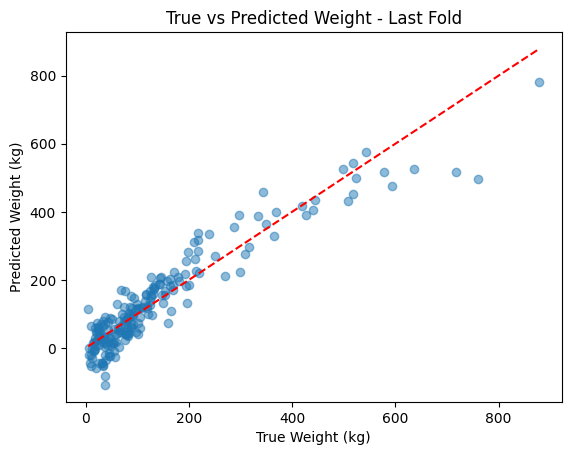

In [11]:
plt.scatter(y_val, preds, alpha=0.5)
plt.xlabel('True Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('True vs Predicted Weight - Last Fold')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()
